### 《Python与机器学习实战》何宇健.电子工业出版社.201706
* [何宇健（射命丸咲）的GitHub](https://github.com/carefree0910/MachineLearning)

> 第—个机器学习样例，P12

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[第一个机器学习样例](http://www.carefree0910.com/posts/372587d5/)

In [2]:
# 定义存储输入数据（x）和目标数据（y）的数组
x, y = [], []

In [3]:
# 遍历数据集，变量sample对应的是一个个样本
for sample in open("Data/prices.txt", "r"):
    # 由于数据是用逗号隔开的，所以调用Python中的split方法并将逗号作为参数传入
    xx, yy = sample.split(",")
    # 将字符串数据转化为浮点数
    x.append(float(xx))
    y.append(float(yy))

In [4]:
# 读取完数据后，将它们转化为Numpy数组以方便进一步的处理
x, y = np.array(x), np.array(y)

In [5]:
# Perform normalization
# 对数值较大的数字做简单的处理，以期望降低问题的复杂度，
# 这里，采用常用的数据标准化方法：X = （X - X'）/std(X)
x = (x - x.mean()) / x.std()

## $X = \frac{X - \bar X}{std(X)}$

In [6]:
x

array([  1.31415422e-01,  -5.09640698e-01,   5.07908699e-01,
        -7.43677059e-01,   1.27107075e+00,  -1.99450507e-02,
        -5.93588523e-01,  -7.29685755e-01,  -7.89466782e-01,
        -6.44465993e-01,  -7.71822042e-02,  -8.65999486e-04,
        -1.40779041e-01,   3.15099326e+00,  -9.31923697e-01,
         3.80715024e-01,  -8.65782986e-01,  -9.72625673e-01,
         7.73743478e-01,   1.31050078e+00,  -2.97227261e-01,
        -1.43322915e-01,  -5.04552951e-01,  -4.91995958e-02,
         2.40309445e+00,  -1.14560907e+00,  -6.90255715e-01,
         6.68172729e-01,   2.53521350e-01,   8.09357707e-01,
        -2.05647815e-01,  -1.27280274e+00,   5.00114703e-02,
         1.44532608e+00,  -2.41262044e-01,  -7.16966387e-01,
        -9.68809863e-01,   1.67029651e-01,   2.81647389e+00,
         2.05187753e-01,  -4.28236746e-01,   3.01854946e-01,
         7.20322135e-01,  -1.01841540e+00,  -1.46104938e+00,
        -1.89112638e-01,  -1.01459959e+00])

In [7]:
y

array([ 399900.,  329900.,  369000.,  232000.,  539900.,  299900.,
        314900.,  198999.,  212000.,  242500.,  239999.,  347000.,
        329999.,  699900.,  259900.,  449900.,  299900.,  199900.,
        499998.,  599000.,  252900.,  255000.,  242900.,  259900.,
        573900.,  249900.,  464500.,  469000.,  475000.,  299900.,
        349900.,  169900.,  314900.,  579900.,  285900.,  249900.,
        229900.,  345000.,  549000.,  287000.,  368500.,  329900.,
        314000.,  299000.,  179900.,  299900.,  239500.])

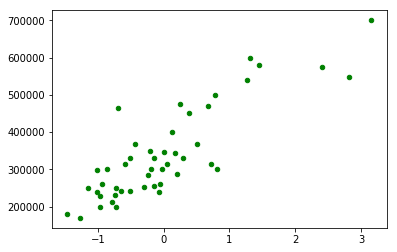

In [8]:
# 将原始数据以散点图的形式画出
plt.figure()
plt.scatter(x, y, c="g", s=20)
plt.show()

In [9]:
# 通过可视化原始数据，可以非常直观地感受到：很有可能通过线性回归（Linear Regression）
# 中的多项式拟合来得到一个不错的结果
# 在（-2,4）这个区间上取100个点作为画图的基础
x0 = np.linspace(-2, 4, 100)

## $f(x|p;n)=p_0x^n+p_1x^{n-1}+...+p_{n-1}x+p_n$

## $L(p;n)=\frac 12\sum_{i=1}^{m}[f(x|p;n)-y]^2$

In [10]:
# Get regression model under LSE criterion with degree 'deg'
# 利用Numpy的函数定义训练并返回多项式回归模型的函数
# deg参数代表着模型中的n，即模型中多项式的次数
# 返回的模型能够根据输入的x（默认是x0），返回相对于的预测的y
def get_model(deg):
    return lambda input_x=x0: np.polyval(np.polyfit(x, y, deg), input_x)

In [11]:
# 模型做好后，我们就要尝试判断各种参数下模型的好坏，
# 我们训练的目的是最小化损失函数，用损失函数来衡量模型的好坏似乎是一个合理的做法。
# Get the cost of regression model above under given x, y
# 根据参数n，输入的x，y返回相对于的损失
def get_cost(deg, input_x, input_y):
    return 0.5 * ((get_model(deg)(input_x) - input_y) ** 2).sum()

In [12]:
# 定义测试参数集并根据它进行各种实验
# Set degrees
test_set = (1, 4, 10)
for d in test_set:
    # 输出相应的损失
    print(get_cost(d, x, y))

96732238800.4
94112406641.7
75874846680.1


In [13]:
# 输出相应的图像
# Visualize results
plt.scatter(x, y, c="g", s=20)
for d in test_set:
    plt.plot(x0, get_model(d)(), label="degree = {}".format(d))

In [14]:
# 将横轴、纵轴的范围分别限制在（-2,4），（10^5,8×10^5）
plt.xlim(-2, 4)
plt.ylim(1e5, 8e5)

(100000.0, 800000.0)

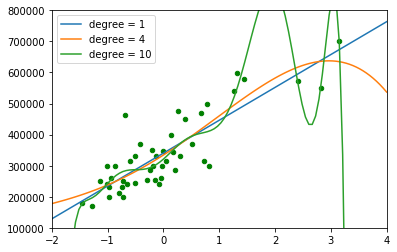

In [15]:
# 调用legend方法使曲线对于的label正确显示
plt.legend()
plt.show()